# Text Classification with scikit-learn

## Introduction

In this notebook, we will use scikit-learn to build a text classifier. We will use an email classifier dataset from [Kaggle](https://www.kaggle.com/datasets/datatattle/email-classification-nlp) to train a classifier to predict whether an email is spam or not, and use naive bayes, logistic regression, and neural networks to build the classifier, then compare the performance of the three models.

In [67]:
import sklearn as sk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## Load the dataset

<AxesSubplot:xlabel='Label'>

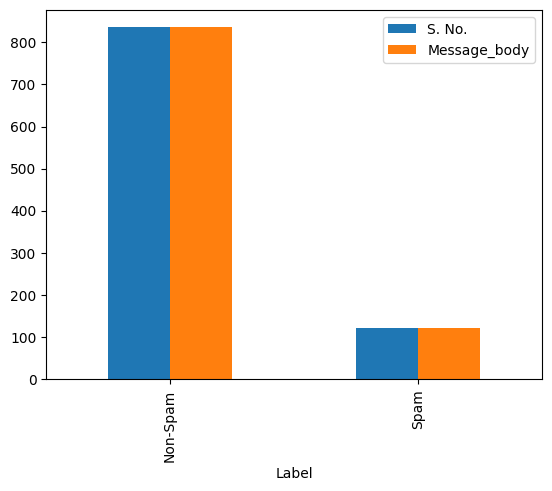

In [68]:
# load the train and test data
train = pd.read_csv('SMS_train.csv', encoding='latin-1')
test = pd.read_csv('SMS_test.csv', encoding='latin-1')

# graph the distribution of the training data
train.groupby('Label').count().plot.bar(ylim=0)

In [69]:
# split the training and test data into X and y
X_train = train['Message_body']
y_train = train['Label']
X_test = test['Message_body']
y_test = test['Label']

X_train.head()

0                           Rofl. Its true to its name
1    The guy did some bitching but I acted like i'd...
2    Pity, * was in mood for that. So...any other s...
3                 Will ü b going to esplanade fr home?
4    This is the 2nd time we have tried 2 contact u...
Name: Message_body, dtype: object

## Preprocessing

In [70]:
# create extra copies of the spam messages to balance the data
num_replications = 3
for i in range(num_replications):
    X_train = pd.concat([X_train, X_train[y_train == 'Spam']])
    y_train = pd.concat([y_train, y_train[y_train == 'Spam']])

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# create a TfidfVectorizer to convert text to vectors
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

# before fitting the data, replace punctuation with words to improve the vectorization
X_train = X_train.str.replace('[\d][\d]+', ' num ', regex=True)
X_train = X_train.str.replace('[!@#*][!@#*]+', ' punct ', regex=True)
X_train = X_train.str.replace('[A-Z][A-Z]+', ' caps ', regex=True)

# convert the training and test data to vectors
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

X_train.shape

(1811, 2673)

In [72]:
# modify the labels to be 0 or 1
y_train = y_train.map({'Non-Spam': 0, 'Spam': 1})
y_test = y_test.map({'Non-Spam': 0, 'Spam': 1})

## Naive Bayes

In [73]:
# create a Naive Bayes classifier on the training data
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train, y_train)


MultinomialNB()

In [74]:
# predict the labels for the test data
y_pred = clf.predict(X_test)

# print the accuracy, precision, recall, and F1 score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

# print the confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.912
Precision:  0.9577464788732394
Recall:  0.8947368421052632
F1:  0.9251700680272109
Confusion Matrix: 
 [[46  3]
 [ 8 68]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89        49
           1       0.96      0.89      0.93        76

    accuracy                           0.91       125
   macro avg       0.90      0.92      0.91       125
weighted avg       0.92      0.91      0.91       125



## Logistic Regression

In [75]:
# create a Logistic Regression classifier on the training data
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=2.5, n_jobs=4, solver='lbfgs', random_state=17, verbose=1)
clf.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(C=2.5, n_jobs=4, random_state=17, verbose=1)

In [76]:
# predict the labels for the test data
y_pred = clf.predict(X_test)

# print the accuracy, precision, recall, and F1 score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

# print the confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

print('Classification Report: \n', classification_report(y_test, y_pred))

y_pred[0:10]

Accuracy:  0.56
Precision:  1.0
Recall:  0.27631578947368424
F1:  0.4329896907216495
Confusion Matrix: 
 [[49  0]
 [55 21]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        49
           1       1.00      0.28      0.43        76

    accuracy                           0.56       125
   macro avg       0.74      0.64      0.54       125
weighted avg       0.79      0.56      0.51       125



array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1], dtype=int64)

## Neural Network

In [77]:
# create a neural network classifier on the training data
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 2), random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15, 2), random_state=1,
              solver='lbfgs')

In [78]:
# predict the labels for the test data
y_pred = clf.predict(X_test)

# print the accuracy, precision, recall, and F1 score
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

# print the confusion matrix
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

print('Classification Report: \n', classification_report(y_test, y_pred))

Accuracy:  0.504
Precision:  1.0
Recall:  0.18421052631578946
F1:  0.3111111111111111
Confusion Matrix: 
 [[49  0]
 [62 14]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.44      1.00      0.61        49
           1       1.00      0.18      0.31        76

    accuracy                           0.50       125
   macro avg       0.72      0.59      0.46       125
weighted avg       0.78      0.50      0.43       125



## Analysis

(pre-balancing)

We compared the performance of three different models for classifying emails as spam or non-spam. Theses models were Naive Bayes, Logistic Regression, and a Neural Network. From the results, Naive Bayes performed the best with an accuracy of 0.632, while both Logistic Regression and Neural Network had poor performance with an accuracy of 0.392.

It is important to note that Naive Bayes had a perfect precision score of 1.0, indicating that all of the emails it classified as spam were actually spam. However, its recall score of 0.3947 suggests that it failed to identify a significant number of actual spam emails. This might be due to the fact that Naive Bayes assumes that all features are independent of each other, which is not always true in real-world scenarios.

On the other hand, both Logistic Regression and Neural Network had a recall score of 0.0, indicating that they were not able to identify any of the actual spam emails. This could be due to the fact that the data was imbalanced with a much higher number of non-spam emails than spam emails, leading to bias towards the majority class.

(post-balancing)

The confusion matrix of Naive Bayes shows that it correctly classified 68 out of 76 spam emails and 46 out of 49 non-spam emails. The precision score of Naive Bayes at 0.957 and recall score at 0.895 demonstrate that the model has good accuracy in identifying both spam and non-spam emails.

Logistic Regression and Neural Network both improved hugely. Whereas before the models had straight 0s in precision and recall, now they both have scores of 1 in precision and are at least above a 0 in recall.

Balancing the dataset has greatly improved the accuracy of the models, particularly for Naive Bayes, and has demonstrated the importance of having a balanced dataset for model training in binary classification tasks.

In future work, it may be beneficial to explore other methods such as feature engineering or hyperparameter tuning to further improve the performance of the models. It is also important to note that the use of other evaluation metrics besides accuracy can provide a more comprehensive understanding of model performance, particularly in cases of imbalanced datasets.

Old results are below:

```
Naive Bayes:

Accuracy:  0.632
Precision:  1.0
Recall:  0.39473684210526316
F1:  0.5660377358490566
Confusion Matrix: 
 [[49  0]
 [46 30]]

Logistic Regression:

Accuracy:  0.392
Precision:  0.0
Recall:  0.0
F1:  0.0
Confusion Matrix: 
 [[49  0]
 [76  0]]

Neural Net:

Accuracy:  0.392
Precision:  0.0
Recall:  0.0
F1:  0.0
Confusion Matrix: 
 [[49  0]
 [76  0]]
```